<a href="https://colab.research.google.com/github/kumartr/fastai_nbs/blob/master/Nerve_NoNerve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *
from fastai.utils.mem import *

In [0]:
from fastai.utils.collect_env import *
#show_install(True)

In [0]:
import os

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [6]:
from google.colab import drive
 # This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
path = Path('/content/drive/My Drive/Nerve/') 
path.ls()

[PosixPath('/content/drive/My Drive/Nerve/2_MEDIAN   B_20191026_103751_0001.MP4'),
 PosixPath('/content/drive/My Drive/Nerve/3_MEDIAN   C_20191026_103907_0001.MP4'),
 PosixPath('/content/drive/My Drive/Nerve/4_MEDIAN   D_20191026_104128_0001.MP4'),
 PosixPath('/content/drive/My Drive/Nerve/5_MEDIAN   E_20191026_110258_0001.MP4'),
 PosixPath('/content/drive/My Drive/Nerve/NoNerve'),
 PosixPath('/content/drive/My Drive/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4')]

In [8]:
os.getcwd()

'/content'

In [0]:
!mkdir /content/NerveClassify

In [0]:
!mkdir /content/NerveClassify/Nerve
!mkdir /content/NerveClassify/NoNerve

In [11]:
!ls -al /content/NerveClassify/NoNerve

total 8
drwxr-xr-x 2 root root 4096 Dec  9 08:49 .
drwxr-xr-x 4 root root 4096 Dec  9 08:49 ..


In [12]:
os.listdir('/content/drive/My Drive/Nerve/')

['2_MEDIAN   B_20191026_103751_0001.MP4',
 '3_MEDIAN   C_20191026_103907_0001.MP4',
 '4_MEDIAN   D_20191026_104128_0001.MP4',
 '5_MEDIAN   E_20191026_110258_0001.MP4',
 'NoNerve',
 '1_MEDIAN_A_20191026_103606_0001.MP4']

In [16]:
os.listdir('/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422')

['2020 1_NO NERVE 1_20191206_180422.pdf',
 '2020 1_NO NERVE 1_20191206_180422_0001.MP4']

In [0]:
!cp '/content/drive/My Drive/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4' '/content/NerveClassify/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4'

In [0]:
os.chdir('/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422/')

In [0]:
!cp '/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422/2020 1_NO NERVE 1_20191206_180422_0001.MP4'  '/content/NerveClassify/NoNerve/2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
#!cp '/content/drive/My Drive/Nerve/1_MEDIAN\ \ \ \ A_20191026_103606_0001.MP4' '/content/NerveClassify/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4'

In [0]:
#!mv '/content/1_MEDIAN    A_20191026_103606_0001.MP4' '/content/NerveClassify/Nerve/'

In [0]:
#!mv '/content/NerveClassify/Nerve/1_MEDIAN    A_20191026_103606_0001.MP4' '/content/NerveClassify/Nerve/1_MEDIAN_A_20191026_103606_0001.MP4'

In [0]:
#!cp '/content/drive/My Drive/Nerve/NoNerve/2020 1_NO NERVE 1_20191206_180422/2020 1_NO NERVE 1_20191206_180422_0001.MP4'  '/content/NerveClassify/NoNerve/2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
os.chdir('/content/NerveClassify/Nerve/')

In [19]:
os.listdir()

['1_MEDIAN_A_20191026_103606_0001.MP4']

In [20]:
!ffmpeg -i 1_MEDIAN_A_20191026_103606_0001.MP4  -vf fps=42 Nerve_%d.png

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
os.listdir()

In [0]:
!rm '1_MEDIAN_A_20191026_103606_0001.MP4'

In [23]:
os.chdir('/content/NerveClassify/NoNerve/')
os.listdir()

['2020_1_NO_NERVE_1_20191206_180422_0001.MP4']

In [0]:
#!cp '2020 1_NO NERVE 1_20191206_180422/2020 1_NO NERVE 1_20191206_180422_0001.MP4' '2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
os.listdir()

['2020 1_NO NERVE 1_20191206_180422',
 '2020_1_NO_NERVE_1_20191206_180422_0001.MP4']

In [24]:
!ffmpeg -i 2020_1_NO_NERVE_1_20191206_180422_0001.MP4  -vf fps=42 NoNerve_%d.png

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!rm '2020_1_NO_NERVE_1_20191206_180422_0001.MP4'

In [0]:
#!rmdir '2020 1_NO NERVE 1_20191206_180422'

In [0]:
os.listdir()

In [28]:
os.chdir('/content/NerveClassify/')
os.listdir()

['NoNerve', 'Nerve']

In [0]:
path=os.getcwd()

In [0]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,ds_tfms=tfms, size=224).normalize(imagenet_stats)

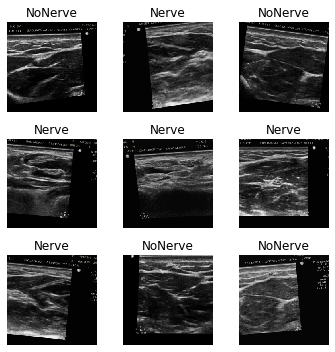

In [31]:
data.show_batch(rows=3, figsize=(5,5))

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 28.0MB/s]


In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.767203,3.203261,0.384615,00:21
1,0.415148,6.653482,0.384615,00:20
2,0.294098,6.630718,0.378205,00:20
3,0.218835,4.519277,0.365385,00:21


In [0]:
learn.save('stage-1')

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

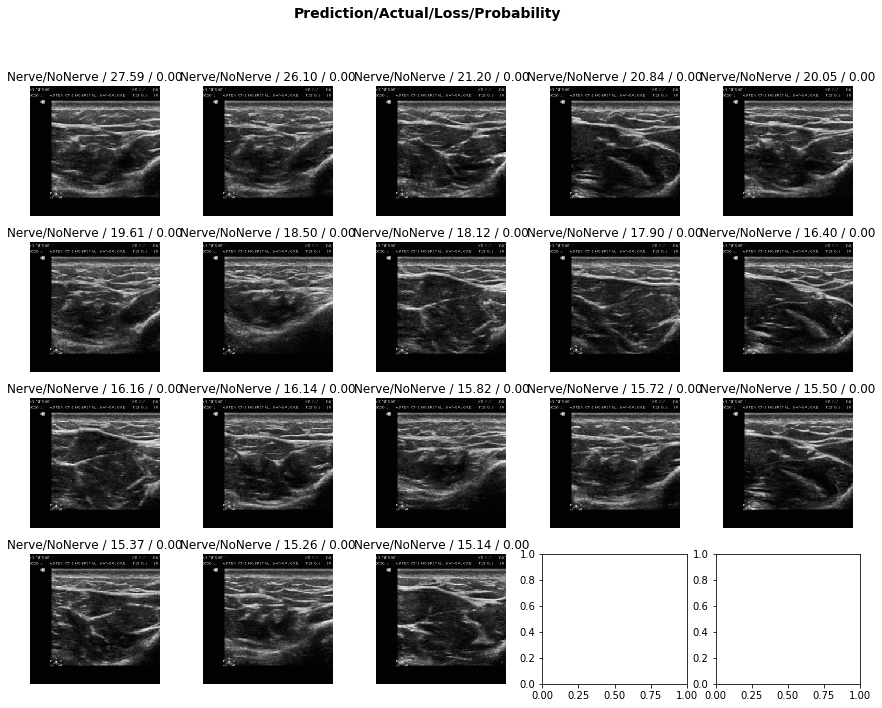

In [36]:
interp.plot_top_losses(18, figsize=(15,11))

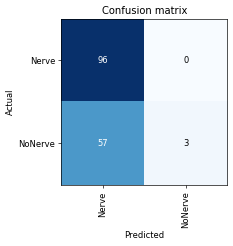

In [37]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [0]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


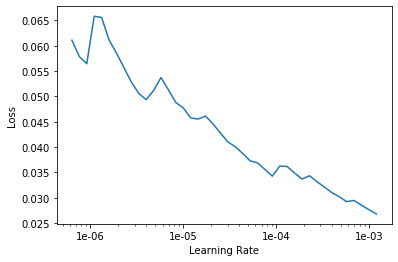

In [40]:
learn.recorder.plot()

In [0]:
learn.load('stage-1');

In [43]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.059347,2.045611,0.301282,00:21
1,0.058547,0.207175,0.038462,00:21
2,0.045861,0.003934,0.000000,00:21
3,0.037993,0.000163,0.000000,00:21


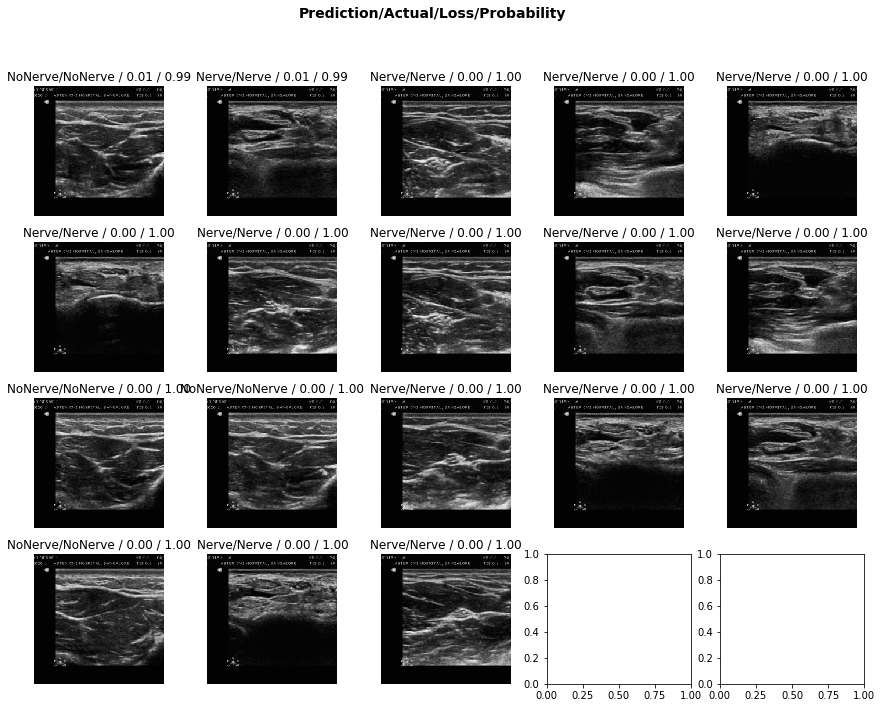

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(18, figsize=(15,11))

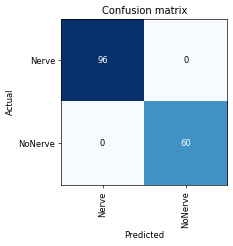

In [45]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [0]:
learn.save('stage-2')